### Regularization

*Cost function with L2 regularization* 
$$J(W,b) = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}log(a^{(i)}) + (1-y^{(i)})log(1-a^{(i)})) + \frac{\lambda}{2m}\sum_{l=1}^{L}||W^{[l]}||^{2}_{F}$$

*Backward propagation with L2 regularization* 
$$W^{[l]} = (1 - \frac{\alpha\lambda}{m})W^{[l]} - \alpha \frac{\partial{J(W,b)}}{W^{[l]}}$$

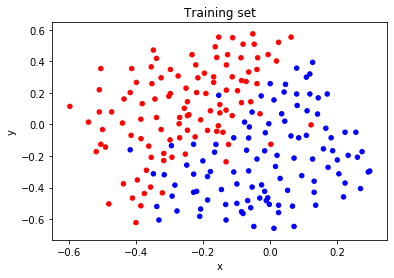

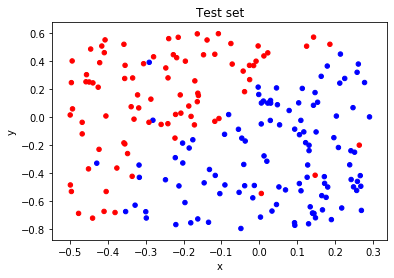

In [24]:
from utils import initialize_weights, linear_forward, sigmoid, relu, activation_forward, forward_prop, sigmoid_backward, linear_backward, activation_backward, backward_prop, predict 
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

data = scipy.io.loadmat('data.mat')
train_X = data['X'].T
train_Y = data['y'].T
test_X = data['Xval'].T
test_Y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0], s=20, cmap=plt.cm.bwr)
plt.title('Training set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(test_X[0, :], test_X[1, :], c=test_Y[0], s=20, cmap=plt.cm.bwr)
plt.title('Test set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
def update_params(param, grads, layer_size, m, alpha, lambd):
    """
    Update weight and intercept parameters
    """
    L = len(layer_size)
    for l in range(1,L):
        param['W' + str(l)] = (1 - (alpha*lambd)/m) * param['W' + str(l)] - alpha * grads['dW' + str(l)]
        param['b' + str(l)] = param['b' + str(l)] - alpha * grads['db' + str(l)]
    return param

def cost(A, Y, layer_dims, param, lambd):
    """
    Calculate the cost function across training examples
    """
    m = Y.shape[1]
    J = -1/m * (np.dot(Y, np.log(A).T) + np.dot(1-Y, np.log(1-A).T))
    L = len(layer_dims)
    L2 = (lambd / (2*m))
    for l in range(1,L):
        L2 = L2 + np.sum(np.square(param['W' + str(l)]))    
    J = np.squeeze(J)
    J = J + L2
    return np.round(J, 3)

In [26]:
if __name__ == '__main__':
    lambd = 0
    alpha = 0.001
    m = train_X.shape[1]
    layer_size = [2, 5, 5, 1]
    param = initialize_weights(layer_size, 'Xavier')
    nepochs = 50000
    for step in range(0,nepochs):
        A, cache = forward_prop(train_X, param, layer_size)
        if step%5000==0:
            J = cost(A, train_Y, layer_size, param, lambd)
            pred, acc = predict(A, train_Y)
            print('step ', step, ', cost=', J, ', acc=', acc, sep='')
        grads = backward_prop(train_Y, A, cache, layer_size)
        param = update_params(param, grads, layer_size, m, alpha, lambd)
        
    J = cost(A, train_Y, layer_size, param, lambd)
    pred, acc = predict(A, train_Y)
    print('step ', step+1, ', cost=', J, ', acc=', acc, sep='')
    
    Atest, cachetest = forward_prop(test_X, param, layer_size)
    J = cost(Atest, test_Y, layer_size, param, lambd)
    pred, acc = predict(Atest, test_Y)
    print('step ', step+1, ', cost (test set)=', J, ', acc (test set)=', acc, sep='')

step 0, cost=12.489, acc=0.5450236966824644
step 5000, cost=12.487, acc=0.7156398104265402
step 10000, cost=12.876, acc=0.7677725118483413
step 15000, cost=14.143, acc=0.7725118483412322
step 20000, cost=16.114, acc=0.8293838862559242
step 25000, cost=18.096, acc=0.8483412322274881
step 30000, cost=20.132, acc=0.8625592417061612
step 35000, cost=21.973, acc=0.8909952606635071
step 40000, cost=23.487, acc=0.909952606635071
step 45000, cost=24.72, acc=0.9241706161137441
step 50000, cost=25.775, acc=0.9241706161137441
step 50000, cost (test set)=25.805, acc (test set)=0.92


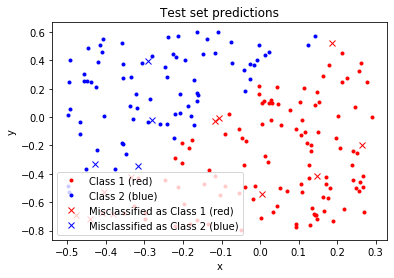

In [27]:
plt.plot(test_X[0, (pred[0]==0) & (test_Y[0]==pred[0])], test_X[1, (pred[0]==0) & (test_Y[0]==pred[0])], '.', color='red', label='Class 1 (red)')
plt.plot(test_X[0, (pred[0]==1) & (test_Y[0]==pred[0])], test_X[1, (pred[0]==1) & (test_Y[0]==pred[0])], '.', color='blue', label='Class 2 (blue)')
plt.plot(test_X[0, (pred[0]==0) & (test_Y[0]!=pred[0])], test_X[1, (pred[0]==0) & (test_Y[0]!=pred[0])], 'x', color='red', label='Misclassified as Class 1 (red)')
plt.plot(test_X[0, (pred[0]==1) & (test_Y[0]!=pred[0])], test_X[1, (pred[0]==1) & (test_Y[0]!=pred[0])], 'x', color='blue', label='Misclassified as Class 2 (blue)')
plt.title('Test set predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()